## STAGE- B Hamoye - MY ID - 147dd7a663c1f000
## NAME : P.ALAGU PRAKALYA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split


### LOAD DATA

In [77]:
df=pd.read_csv("energydata_complete.csv")

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [14]:
df.shape

(19735, 29)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [8]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### DATA PRE-PROCESSING

In [17]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

## Q- 12


<AxesSubplot:xlabel='T2', ylabel='T6'>

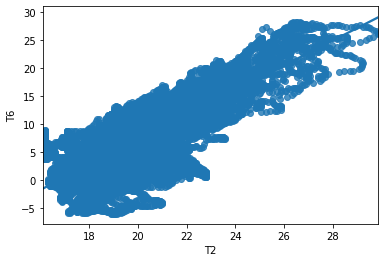

In [78]:
sns.regplot(data=df,x="T2",y="T6")

In [80]:
selected_col=df[["T2","T6"]]
df1=selected_col.copy()

In [79]:
def predicting(new_param,x):
    return new_param['alpha'] + new_param['beta'] * df['T2']

temp=predicting(new_parameter,df['T2'])

In [81]:
def hyperparam_tuning(data, params):
    x, y = data['T2'], data['T6']
    x_bar, y_bar = x.mean(), y.mean()
    x, y = x.to_numpy(), y.to_numpy()
    beta = sum( ((x-x_bar) * (y-y_bar)) / sum( (x-x_bar)**2))
    alpha = y_bar - beta * x_bar
    params['alpha'] = alpha
    params['beta'] = beta

In [82]:
new_parameter = {'alpha' : -2, 'beta' : 1000}
hyperparam_tuning(df1, new_parameter)
new_parameter

{'alpha': -37.34952263844853, 'beta': 2.225061385886405}

In [84]:
df['T6']

0         7.026667
1         6.833333
2         6.560000
3         6.433333
4         6.366667
           ...    
19730    24.796667
19731    24.196667
19732    23.626667
19733    22.433333
19734    21.026667
Name: T6, Length: 19735, dtype: float64

In [91]:
print(round(r2_score (df["T6"],temp),2))

0.64


## Q- 13
### Removed date,light

In [111]:
del df["date"]
del df["lights"]

In [112]:
df.head(3)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


### Normalised

In [113]:
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [114]:
X=normalised_df.iloc[:,1:27]
y=normalised_df["Appliances"]

### 70:30 train test split and random state=42

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

### Multiple Linear Regression

In [116]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

In [117]:
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 2)

0.05

## Q-14

In [118]:
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2) 

45.35

## Q-15

In [119]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 2) 

0.09

## Q-16

In [120]:
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

0.15

## Q-17

In [176]:
def get_weights_df(model, feat, col_name):
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [178]:
linear_model_weights.sort_values(by=['Linear_Model_Weight'], ascending=False)

,Features,Linear_Model_Weight
25,rv1,1.015533e+11
24,RH_1,5.535724e-01
23,T3,2.905510e-01
22,T6,2.363848e-01
21,Tdewpoint,1.177209e-01
20,T8,1.019952e-01
19,RH_3,9.598836e-02
18,RH_6,3.805716e-02
17,Windspeed,2.918709e-02
16,T4,2.900027e-02


In [170]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')


In [173]:
linear_model_weights[linear_model_weights['Linear_Model_Weight']==linear_model_weights['Linear_Model_Weight'].min()]

,Features,Linear_Model_Weight
0,rv2,-1.015533e+11


In [172]:
linear_model_weights[linear_model_weights['Linear_Model_Weight']==linear_model_weights['Linear_Model_Weight'].max()]

,Features,Linear_Model_Weight
25,rv1,1.015533e+11


## Q-18

In [164]:
ridge_reg = Ridge(alpha=0.4)
ridge_reg.fit(x_train, y_train)
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')


In [165]:
predicted_values = ridge_reg.predict(x_test)

In [166]:
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 2) 

0.09

## Q-19

In [167]:
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

In [169]:
lasso_weights_df[(lasso_weights_df.select_dtypes(include=['number']) != 0).any(1)]

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
24,Windspeed,0.002912
25,RH_1,0.017880


## Q-20

In [174]:
predicted_values = lasso_reg.predict(x_test)

rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3) 

0.094